In [ ]:
from keras.datasets import mnist
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten, Dense


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:


input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# flatten
# dense
# reshape

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 78s 161ms/step - loss: 0.2272 - val_loss: 0.1523
Epoch 2/5
469/469 [==============================] - 74s 158ms/step - loss: 0.1412 - val_loss: 0.1311
Epoch 3/5
469/469 [==============================] - 73s 156ms/step - loss: 0.1266 - val_loss: 0.1211
Epoch 4/5
469/469 [==============================] - 70s 150ms/step - loss: 0.1193 - val_loss: 0.1157
Epoch 5/5
469/469 [==============================] - 70s 150ms/step - loss: 0.1151 - val_loss: 0.1121


313/313 [==============================] - 4s 13ms/step


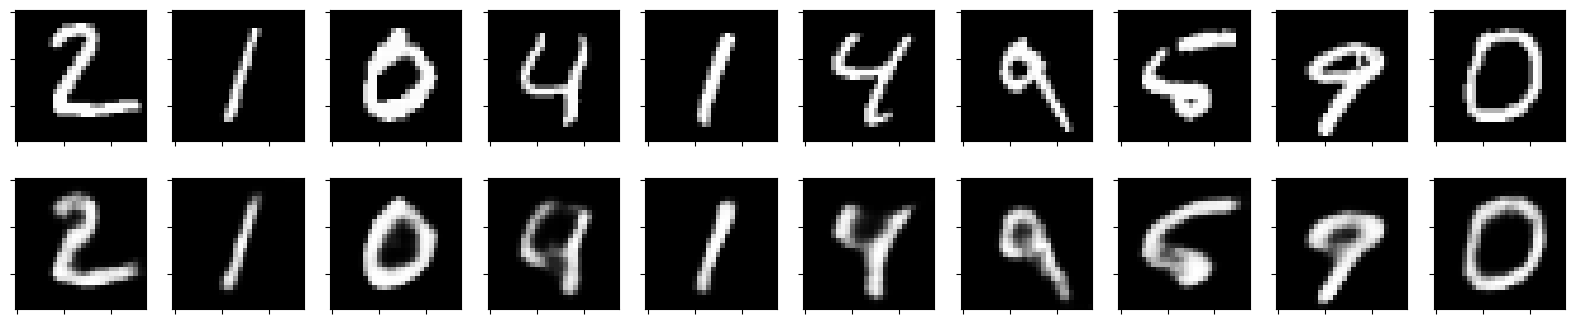

In [ ]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.show()

In [ ]:
print("Compression: ",(768-128)/768)

Compression:  0.8333333333333334


# How you can save model /AE folder

In [ ]:
import pickle
model_save = tf.keras.callbacks.ModelCheckpoint('./AE', monitor='val_loss', verbose=0, save_best_only=False)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test),
                callbacks=[model_save])




Epoch 1/50
1200/1200 [==============================] - 80s 67ms/step - loss: 0.1114 - val_loss: 0.1097
Epoch 2/50
1200/1200 [==============================] - 83s 69ms/step - loss: 0.1078 - val_loss: 0.1059
Epoch 3/50
1200/1200 [==============================] - 83s 69ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 4/50
1200/1200 [==============================] - 82s 68ms/step - loss: 0.1037 - val_loss: 0.1018
Epoch 5/50
1200/1200 [==============================] - 79s 66ms/step - loss: 0.1022 - val_loss: 0.1002
Epoch 6/50
1200/1200 [==============================] - 85s 70ms/step - loss: 0.1010 - val_loss: 0.0990
Epoch 7/50
1200/1200 [==============================] - 84s 70ms/step - loss: 0.0998 - val_loss: 0.0986
Epoch 8/50
1200/1200 [==============================] - 82s 69ms/step - loss: 0.0989 - val_loss: 0.0970
Epoch 9/50
1200/1200 [==============================] - 81s 68ms/step - loss: 0.0979 - val_loss: 0.0964
Epoch 10/50
1200/1200 [==============================] - 82s 68m

# Load model

In [ ]:
ae = keras.models.load_model('./AE')

# Partial Model

In [ ]:
# use model summary to
partial_model = keras.Model(ae.input, ae.layers[8].output)
encodings = partial_model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [ ]:
encodings.shape

(10000, 8, 8, 8)

In [ ]:
with open('./data/visual_encodings_50.pickle', 'wb') as file:
    pickle.dump(encodings, file)

# Workshop 9

## Task 1

In [ ]:
from keras.datasets import mnist
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten, Dense

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# flatten
# dense
# reshape

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.show()

print("Compression: ",(768-128)/768)
import pickle
model_save = tf.keras.callbacks.ModelCheckpoint('./AE', monitor='val_loss', verbose=0, save_best_only=False)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test),
                callbacks=[model_save])


ae = keras.models.load_model('./AE')
# use model summary to
partial_model = keras.Model(ae.input, ae.layers[8].output)
encodings = partial_model.predict(x_train)

encodings.shape

with open('./data/visual_encodings_50.pickle', 'wb') as file:
    pickle.dump(encodings, file)

Epoch 1/5
469/469 [==============================] - 5s 7ms/step - loss: 0.2050 - val_loss: 0.1440
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1346 - val_loss: 0.1250
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1217 - val_loss: 0.1169
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1156 - val_loss: 0.1124
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1118 - val_loss: 0.1089
Epoch 1/5
469/469 [==============================] - 6s 8ms/step - loss: 0.2227 - val_loss: 0.1431
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1333 - val_loss: 0.1253
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1229 - val_loss: 0.1183
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1173 - val_loss: 0.1141
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


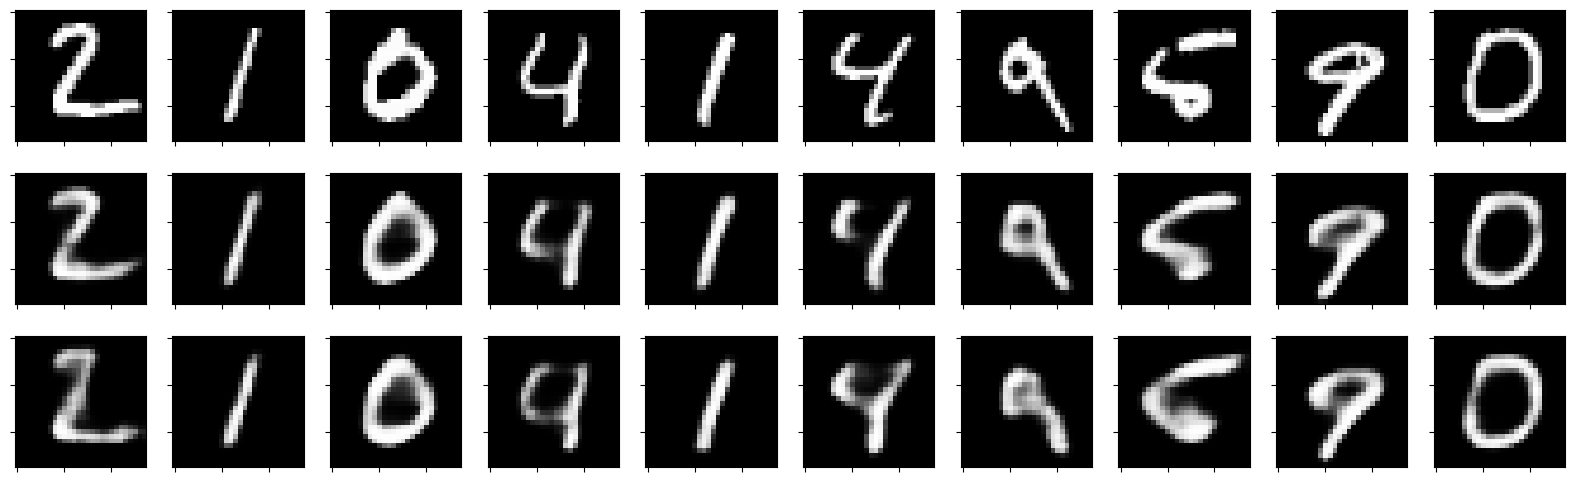

Compression ratio for 20 hidden neurons: 0.9739583333333334
Compression ratio for 87 hidden neurons: 0.88671875
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
            

In [ ]:
from keras.models import load_model

def build_autoencoder(hidden_neurons):
    input_img = keras.Input(shape=(28, 28, 1))
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Build and train autoencoder with 20 hidden neurons
autoencoder_20 = build_autoencoder(hidden_neurons=20)
autoencoder_20.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Build and train autoencoder with 87 hidden neurons
autoencoder_87 = build_autoencoder(hidden_neurons=87)
autoencoder_87.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Visualize reconstructed images for both autoencoders
decoded_imgs_20 = autoencoder_20.predict(x_test)
decoded_imgs_87 = autoencoder_87.predict(x_test)

# Compare results
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

    # Display reconstruction for 20 hidden neurons
    ax = plt.subplot(3, n, i + n)
    plt.imshow(decoded_imgs_20[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

    # Display reconstruction for 87 hidden neurons
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs_87[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

plt.show()

# Calculate compression ratios
compression_20 = (768 - 20) / 768
compression_87 = (768 - 87) / 768

print("Compression ratio for 20 hidden neurons:", compression_20)
print("Compression ratio for 87 hidden neurons:", compression_87)

# Print model summaries to compare computational complexity
autoencoder_20.summary()
autoencoder_87.summary()

In [ ]:
import time

# Measure training time for autoencoder with 20 hidden neurons
start_time = time.time()
autoencoder_20.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
training_time_20 = time.time() - start_time

# Measure training time for autoencoder with 87 hidden neurons
start_time = time.time()
autoencoder_87.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
training_time_87 = time.time() - start_time

# Measure inference time for autoencoder with 20 hidden neurons
start_time = time.time()
decoded_imgs_20 = autoencoder_20.predict(x_test)
inference_time_20 = time.time() - start_time

# Measure inference time for autoencoder with 87 hidden neurons
start_time = time.time()
decoded_imgs_87 = autoencoder_87.predict(x_test)
inference_time_87 = time.time() - start_time

# Print the results
print("Training Time (20 Hidden Neurons):", training_time_20)
print("Training Time (87 Hidden Neurons):", training_time_87)
print("Inference Time (20 Hidden Neurons):", inference_time_20)
print("Inference Time (87 Hidden Neurons):", inference_time_87)


Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1088 - val_loss: 0.1070
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1065 - val_loss: 0.1044
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1046 - val_loss: 0.1029
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1031 - val_loss: 0.1016
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1019 - val_loss: 0.1003
Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1107 - val_loss: 0.1082
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1082 - val_loss: 0.1068
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1064 - val_loss: 0.1047
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1049 - val_loss: 0.1032
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Training Time (20 Hidden Neurons): 19.21608

In [ ]:
# Print model summaries
print("Autoencoder with 20 Hidden Neurons:")
autoencoder_20.summary()

print("\nAutoencoder with 87 Hidden Neurons:")
autoencoder_87.summary()

Autoencoder with 20 Hidden Neurons:
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)   